<a href="https://colab.research.google.com/github/KhareShruti/SevenCode-Mall-Customer-Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***MALL CUSTOMER SEGMENTATION***

We have utilized a dataset sourced from Kaggle, featuring various attributes such as age, gender, annual income, and spending score.

In our analysis, we'll conduct Customer Segmentation using Python. This process involves the following steps:

1. **Installing Required Libraries:** Setting up the essential tools for our analysis.

2. **Exploratory Data Analysis (EDA):** Understanding the dataset through statistical and visual exploration to gain insights.

3. **Visualization and Interpretation:** Presenting the clustered data visually and deriving meaningful insights from the results.

4. **Clustering Analysis (K-Means):** Employing the K-Means algorithm to group similar customers together.

5. **Conclusion-** Clusters representing specific customer segments, each with unique spending behaviors and demographics.

These steps will enable us to effectively analyze and understand the customer segments within the dataset."

In [35]:
pip install google.colab.data_table

ERROR: Could not find a version that satisfies the requirement google.colab.data_table (from versions: none)
ERROR: No matching distribution found for google.colab.data_table


### ***Installing Required Libraries***

In [36]:
# Connecting Google Drive with Google Colab

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import numpy as pd                     # Mainly for handling Multi-Dimensional Arrays
import pandas as pd                    # It is a Python Data Analysis lib.for Viewing, selecting, filtering and analyzing data
import seaborn as sns                  # A Python data vislualization lib. based on matplotlib
import matplotlib.pyplot as plt        # Visualization library of Python
import warnings                        # Used for warnings
warnings.filterwarnings('ignore')

### ***Exploratory Data Analysis (EDA)***

***Uploading the dataset***

In [38]:
# Connecting Google Drive with Google Colab

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [39]:
# Importing the dataset

data=pd.read_csv("/content/drive/MyDrive/Python Projects/Mall Customer Segementation/Mall_Customers.csv")

In [40]:
df = pd.DataFrame(data)

In [41]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


***Performing Descriptive Data Analysis***

In [42]:
data.shape

(200, 5)

In [43]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [45]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
# Since, it is shown that we have no null values so it would be easier for us to proceed further as we dont need to handle it.

In [47]:
df.drop(["CustomerID"], axis=1, inplace=True)

# The 'CustomerID' feature is not crucial for our purposes. Hence, we will exclude it from our further analysis.

In [48]:
df.rename(columns={'Spending Score (1-100)': 'Spending Score' }, inplace=True)
df.rename(columns={'Annual Income (k$)': 'Annual Income'}, inplace=True)

# We will rename the columns because they contain special characters that could potentially cause errors in future analysis

In [49]:
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


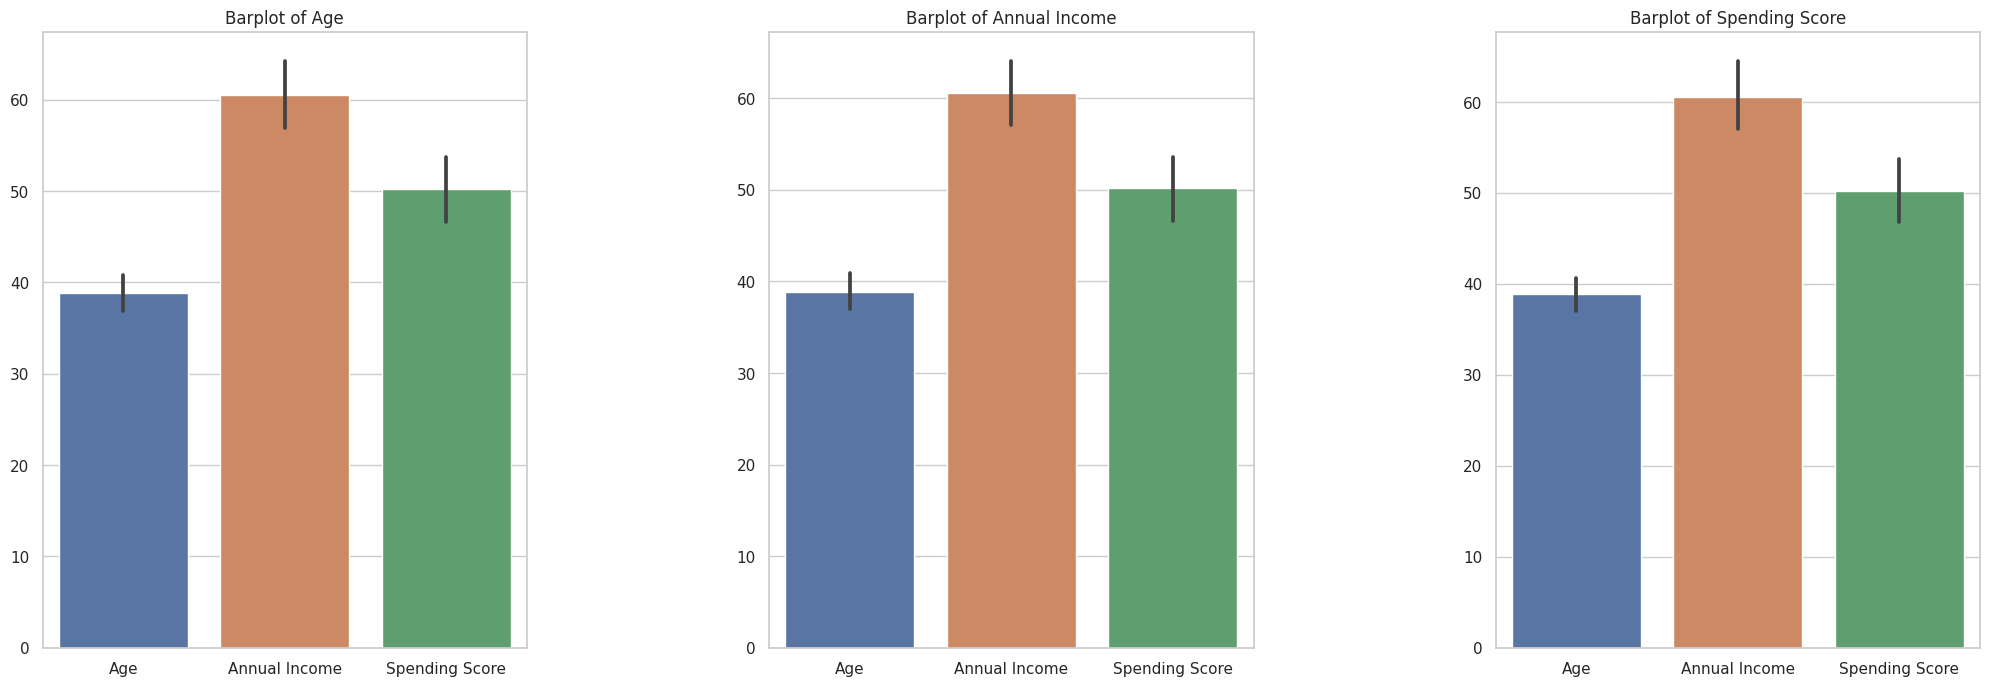

In [50]:
# Here we will be visualizing the neccesary features of the dataset

plt.figure(1, figsize=(25,8))
n=0
for x in ['Age', 'Annual Income', 'Spending Score']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.barplot(data=df)
  plt.title('Barplot of {}'.format(x))
plt.show()

Text(0.5, 1.0, 'KDE Plot of Age by Gender')

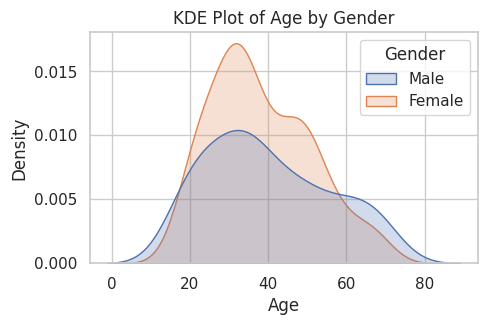

In [51]:
# Comparison between number of males versus females

plt.figure(1, figsize=(5,3))
sns.kdeplot(data=data, x='Age', hue='Gender', fill=True)
plt.xlabel('Age')
plt.title('KDE Plot of Age by Gender')
#plt.show()

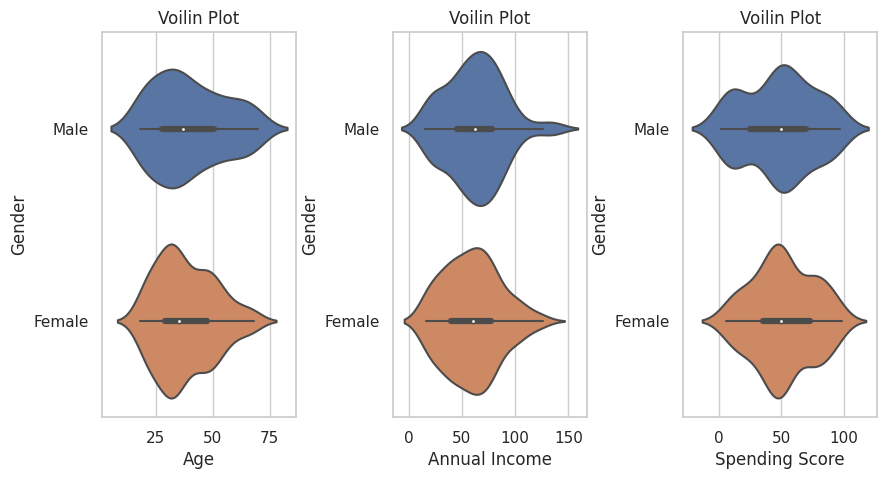

In [52]:
# Here, We will be visualizing the results of main features with respect to Gender

plt.figure(1, figsize=(10,5))
n=0
for cols in ['Age', 'Annual Income', 'Spending Score']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.violinplot(x= cols, y='Gender', data=df)
  plt.ylabel=('Gender' if n == 1 else '')
  plt.title('Voilin Plot')
plt.show()

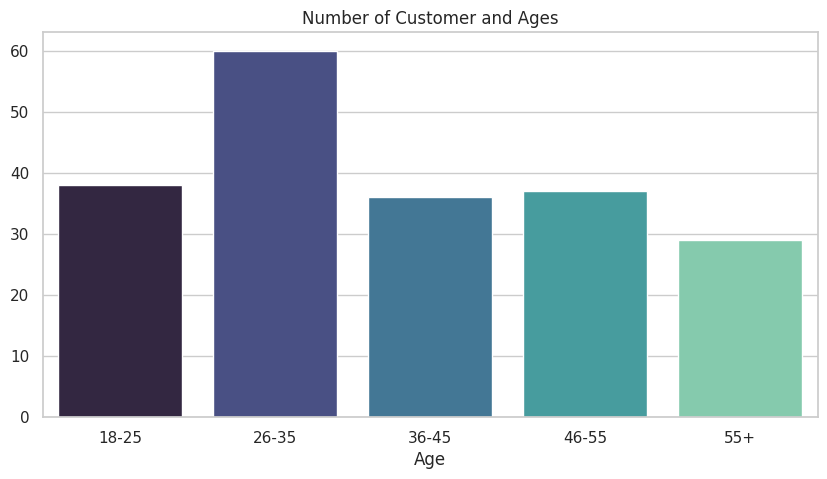

In [53]:
# Dividing age into different groups to visiualize different ranges

age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above = df.Age[df.Age>=56]

agex=["18-25", "26-35", "36-45", "46-55", "55+"]
agey=[len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.show()

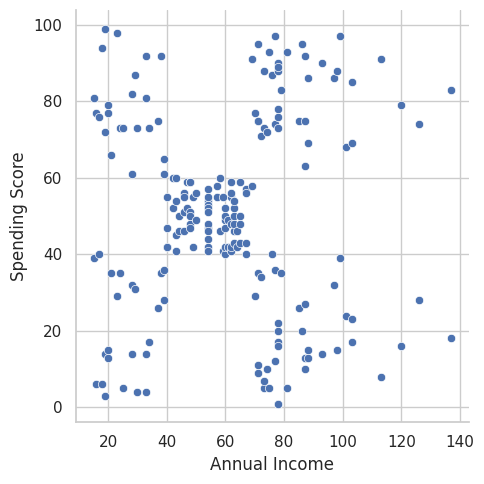

In [54]:
# Relationship between Annual Income and Spending Score

sns.relplot(x="Annual Income", y="Spending Score", data=df)

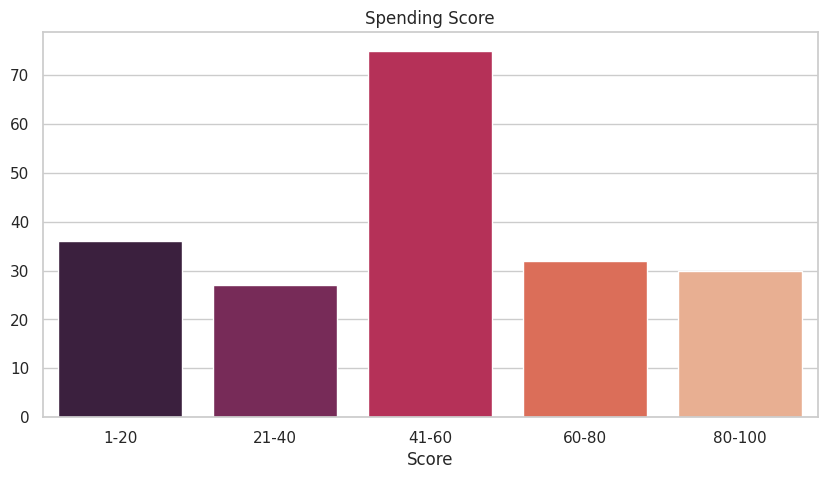

In [55]:
# Next,we will be visualizing different ranges of spending score

ss_1_20 = df["Spending Score"][(df["Spending Score"] >= 1) & (df["Spending Score"] <=20)]
ss_21_40 = df["Spending Score"][(df["Spending Score"] >= 21) & (df["Spending Score"] <=40)]
ss_41_60 = df["Spending Score"][(df["Spending Score"] >= 41) & (df["Spending Score"] <=60)]
ss_61_80 = df["Spending Score"][(df["Spending Score"] >= 61) & (df["Spending Score"] <=80)]
ss_81_100 = df["Spending Score"][(df["Spending Score"] >= 81) & (df["Spending Score"] <=100)]

ssx=["1-20", "21-40", "41-60", "60-80", "80-100"]
ssy=[len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Score")
plt.xlabel("Score")
plt.show()

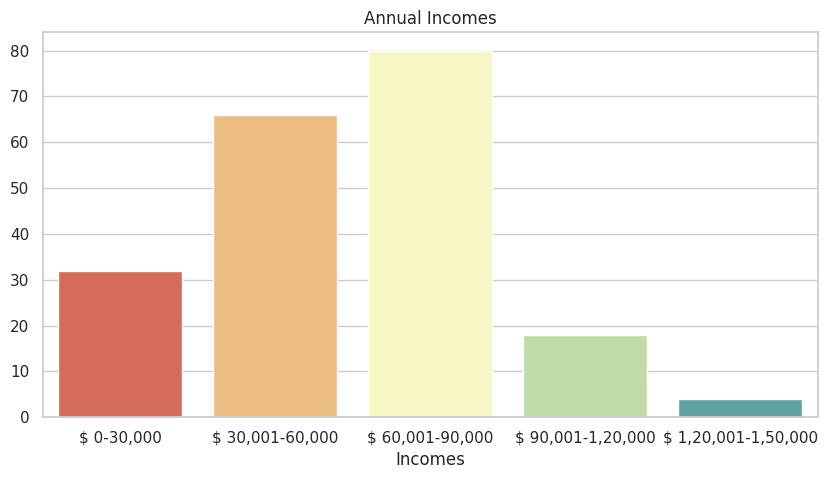

In [56]:
# Visualization for minimum and maximum value of income

ai_1_20 = df["Annual Income"][(df["Annual Income"] >= 1) & (df["Annual Income"] <=30)]
ai_31_60 = df["Annual Income"][(df["Annual Income"] >= 31) & (df["Annual Income"] <=60)]
ai_61_90 = df["Annual Income"][(df["Annual Income"] >= 61) & (df["Annual Income"] <=90)]
ai_91_120 = df["Annual Income"][(df["Annual Income"] >= 91) & (df["Annual Income"] <=120)]
ai_121_150 = df["Annual Income"][(df["Annual Income"] >= 121) & (df["Annual Income"] <=150)]

aix=["$ 0-30,000", "$ 30,001-60,000", "$ 60,001-90,000", "$ 90,001-1,20,000", "$ 1,20,001-1,50,000"]
aiy=[len(ai_1_20.values), len(ai_31_60.values), len(ai_61_90.values), len(ai_91_120.values), len(ai_121_150.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Incomes")
plt.show()

### ***K-Means Clustering***


***Age and Spending score***

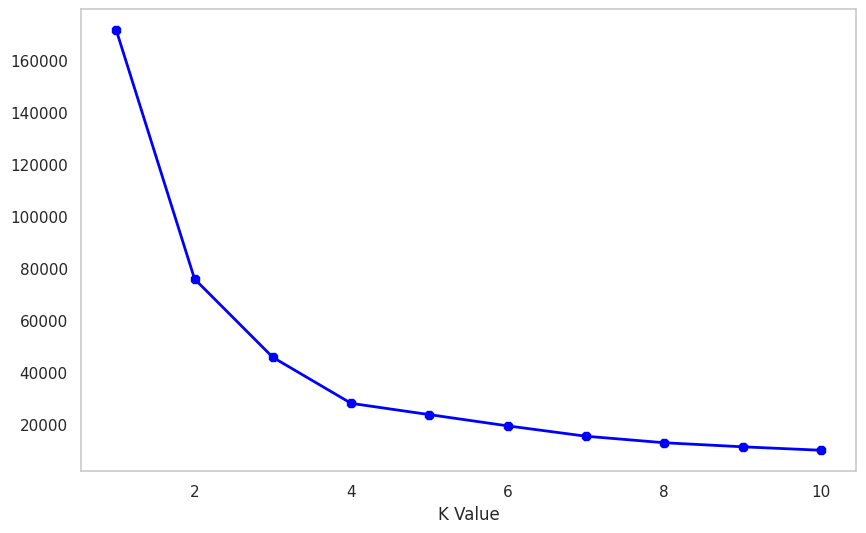

In [57]:
# Finding the relationship between Age and Spending score and gradually clustering the data accordingly

X1=df.loc[:, ["Age", "Spending Score"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="blue", marker="8")
plt.xlabel("K Value")
plt.show()

In [58]:
# Optimum number of clusters that we need in our data is 4

kmeans = KMeans(n_clusters=4)
label=kmeans.fit_predict(X1)
print(label)


[1 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 1 1 0 3 1 3 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0
 3 0 3 2 3 2 1 0 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 3 1 3 2 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 2 3
 0 3 0 3 0 3 0 3 0 3 0 3 2 3 0 3 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 3 0 3 1
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


In [59]:
# Looking out for the Centroids

print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]]


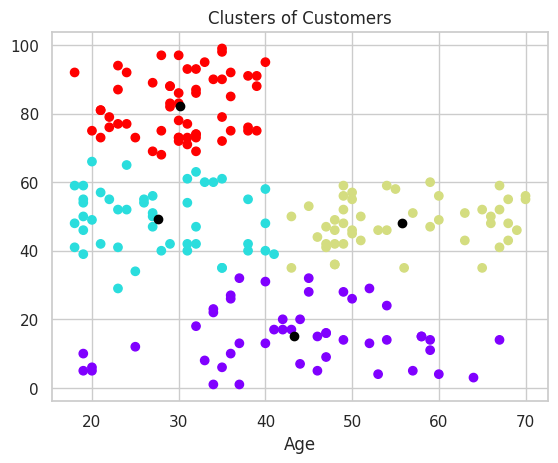

In [60]:
# Visualizing these Clusters on a graph

plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.show()

***Annual Income and Spending Score***

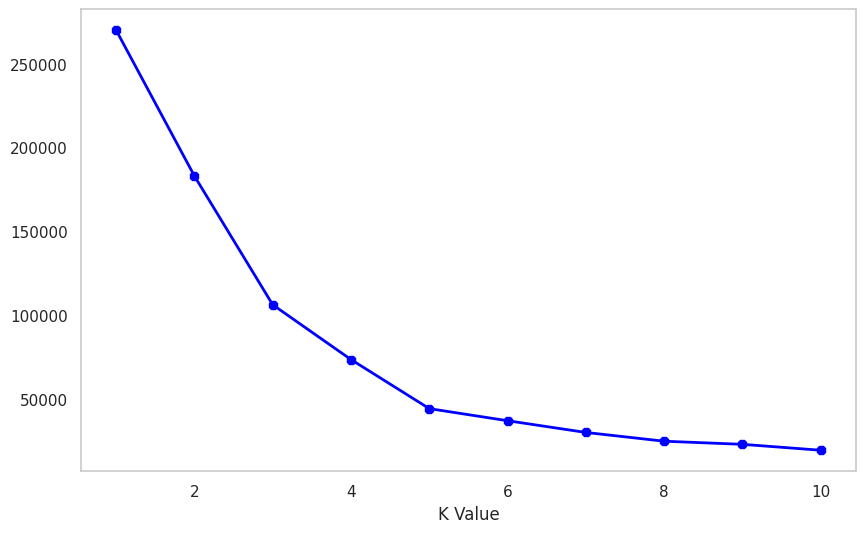

In [61]:
# Finding the relationship between Annual Income and Spending score and gradually clustering the data accordingly


X2=df.loc[:, ["Annual Income", "Spending Score"]].values

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="blue", marker="8")
plt.xlabel("K Value")
plt.show()

In [62]:
# Optimum number of clusters that we need in our data is 5

kmeans = KMeans(n_clusters=5)
label=kmeans.fit_predict(X2)
print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [63]:
# Looking out for the Centroids

print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


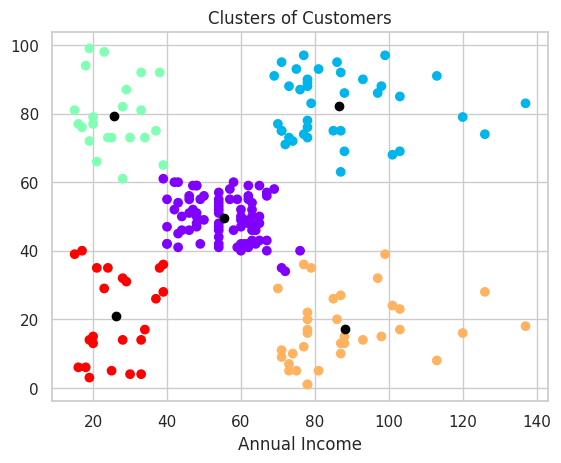

In [64]:
# Visualizing these Clusters on a graph

plt.scatter(X2[:,0], X2[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="black")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.show()

***Visualizing All Three Features Together-AGE, ANNUAL INCOME and SPENDING SCORE***

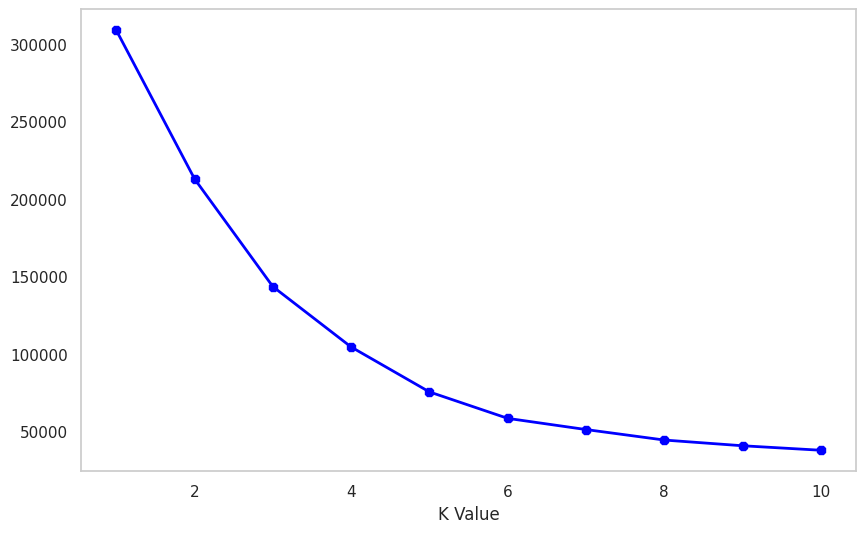

In [65]:
# Finding the relationship between Age, Annual Income and Spending score and gradually clustering the data accordingly

X3=df.iloc[:,1:]

from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="blue", marker="8")
plt.xlabel("K Value")
plt.show()

In [66]:
# Optimum number of clusters that we need in our data is 5

kmeans = KMeans(n_clusters=5)
label=kmeans.fit_predict(X3)
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [67]:
# Looking out for the Centroids

print(kmeans.cluster_centers_)

[[43.12658228 54.82278481 49.83544304]
 [32.69230769 86.53846154 82.12820513]
 [40.32432432 87.43243243 18.18918919]
 [25.27272727 25.72727273 79.36363636]
 [45.2173913  26.30434783 20.91304348]]


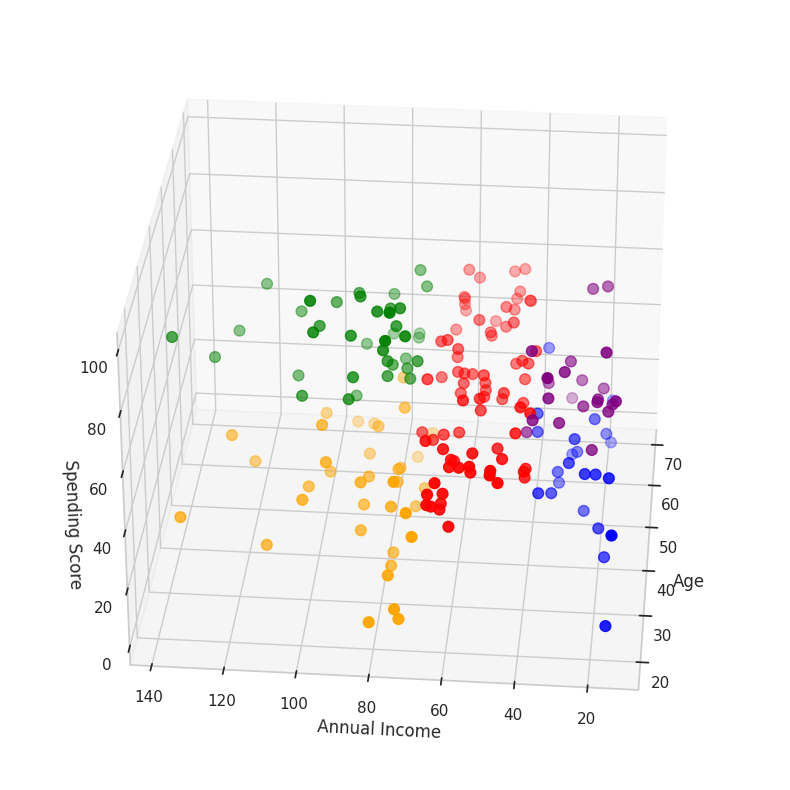

In [68]:
# Implementing 3D Graph as now we have 3 axis

clusters=kmeans.fit_predict(X3)
df["label"]=clusters


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0], df["Annual Income"][df.label==0], df["Spending Score"][df.label==0], c='blue', s=60)
ax.scatter(df.Age[df.label==1], df["Annual Income"][df.label==1], df["Spending Score"][df.label==1], c='red', s=60)
ax.scatter(df.Age[df.label==2], df["Annual Income"][df.label==2], df["Spending Score"][df.label==2], c='green', s=60)
ax.scatter(df.Age[df.label==3], df["Annual Income"][df.label==3], df["Spending Score"][df.label==3], c='orange', s=60)
ax.scatter(df.Age[df.label==4], df["Annual Income"][df.label==4], df["Spending Score"][df.label==4], c='purple', s=60)
ax.view_init(30,185)

ax.set_xlabel("Age")
ax.set_ylabel("Annual Income")
ax.set_zlabel("Spending Score")

plt.show()

## ***In this way we can clearly see that we have 5 Clusters formed for the Customer Segementation***